# Exploración inicial dataset de Covid-19

In [1]:
%matplotlib notebook
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(0)
pd.set_option('display.max_columns', None)

In [2]:
covid_csv_path = '../data/raw/covid_xray/metadata.csv'
covid_images_path = '../data/raw/covid_xray/images/'
covid_df = pd.read_csv(covid_csv_path)
covid_df.head()

,patientid,offset,sex,age,finding,survival,intubated,intubation_present,went_icu,needed_supplemental_O2,extubated,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count,view,modality,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 27
0,2,0.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,infiltrate in the upper lobe of the left lung,NaN,NaN
1,2,3.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
2,2,5.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
3,2,6.0,M,65.0,COVID-19,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,progressive infiltrate and consolidation,NaN,NaN
4,4,0.0,F,52.0,COVID-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,X-ray,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [3]:
covid_df.describe()

,patientid,offset,age,temperature,pO2_saturation,leukocyte_count,neutrophil_count,lymphocyte_count
count,312.000000,225.000000,262.000000,22.000000,33.000000,9.000000,2.000000,5.000000
mean,82.983974,6.817778,54.553435,40.795455,88.948485,5.524444,3.590000,1.132000
std,51.974917,7.056383,15.687166,12.132894,11.226646,3.099456,2.771859,0.433786
min,2.000000,0.000000,12.000000,36.500000,50.000000,0.220000,1.630000,0.630000
25%,34.750000,2.000000,43.000000,37.800000,88.000000,3.150000,2.610000,0.800000
50%,83.500000,5.000000,55.000000,38.100000,92.000000,6.370000,3.590000,1.200000
75%,126.250000,10.000000,68.750000,39.000000,97.000000,6.840000,4.570000,1.300000
max,176.000000,35.000000,87.000000,95.000000,98.000000,11.200000,5.550000,1.730000


In [4]:
covid_df.count()

patientid                 312
offset                    225
sex                       273
age                       262
finding                   312
survival                   92
intubated                  48
intubation_present         43
went_icu                   14
needed_supplemental_O2      3
extubated                   3
temperature                22
pO2_saturation             33
leukocyte_count             9
neutrophil_count            2
lymphocyte_count            5
view                      312
modality                  312
date                      288
location                  214
folder                    312
filename                  312
doi                        99
url                       312
license                   167
clinical_notes            306
other_notes               215
Unnamed: 27                 4
dtype: int64

### Nos quedaremos sólo con las imágenes que sean de rayos X

In [5]:
covid_df['modality'].unique()

array(['X-ray', 'CT'], dtype=object)

In [6]:
covid_xray_df = covid_df[covid_df['modality'] == 'X-ray']
len(covid_xray_df)

268

### Existen distintos tipos de vistas en las radiografías, que se analizan a continuación

In [7]:
views = covid_xray_df['view'].unique()
for view in views:
    print(view, len(covid_xray_df[covid_xray_df['view'] == view]))

PA 177
L 25
AP 37
AP Supine 28
AP semi erect 1


<IPython.core.display.Javascript object>


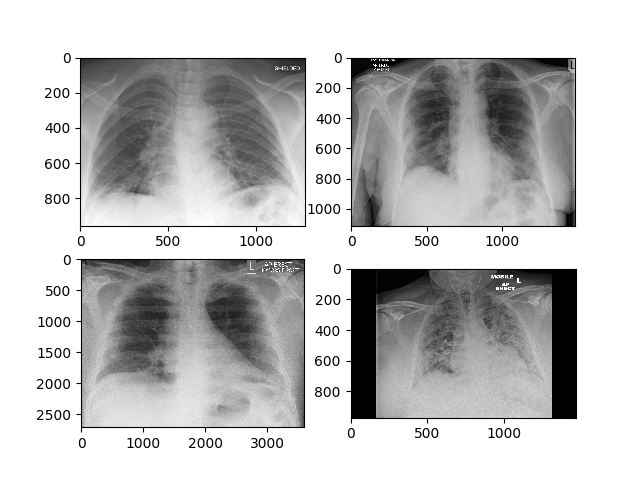

In [8]:
covid_xray_ap_df = covid_xray_df[covid_xray_df['view'] == 'AP']
fig, ax = plt.subplots(2,2)
imgs_path = covid_xray_ap_df.sample(frac=1)[:4]['filename'].apply(lambda x: os.path.join(covid_images_path, x)).tolist()
for idx, img_path in enumerate(imgs_path):
    i, j = int(idx / 2), int(idx % 2)
    ax[i,j].imshow(cv2.imread(img_path))

<IPython.core.display.Javascript object>


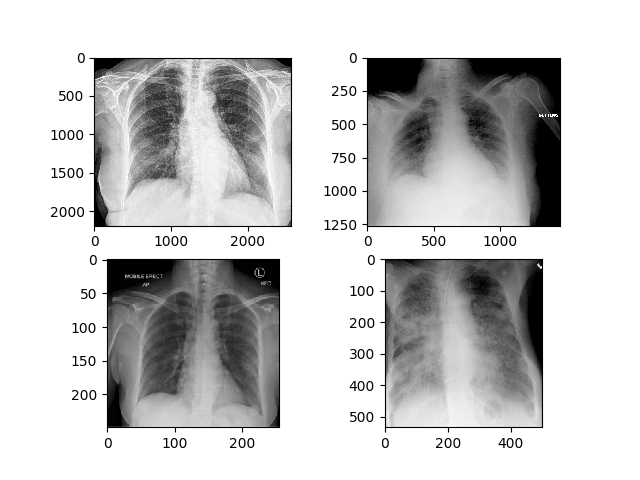

In [9]:
covid_xray_pa_df = covid_xray_df[covid_xray_df['view'] == 'PA']
fig, ax = plt.subplots(2,2)
imgs_path = covid_xray_pa_df.sample(frac=1)[:4]['filename'].apply(lambda x: os.path.join(covid_images_path, x)).tolist()
for idx, img_path in enumerate(imgs_path):
    i, j = int(idx / 2), int(idx % 2)
    ax[i,j].imshow(cv2.imread(img_path))

### La mayoría de las imágenes son de vista PA
Posteroanterior, de acuerdo a la interpretación en https://github.com/ieee8023/covid-chestxray-dataset/blob/master/SCHEMA.md

In [10]:
findings = covid_xray_pa_df['finding'].unique()
for finding in findings:
    print(finding, len(covid_xray_pa_df[covid_xray_pa_df['finding'] == finding]))

COVID-19 115
ARDS 4
SARS 16
Pneumocystis 13
Streptococcus 13
No Finding 2
Chlamydophila 1
COVID-19, ARDS 10
Klebsiella 1
Legionella 2
